In [1]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import os

In [2]:
output_dir = "figures"

In [3]:
dic = {}
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/1024_true_coupling.h5ad"] = 512+1024
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/2048_true_coupling.h5ad"] = 1024+2048
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/4096_true_coupling.h5ad"] = 2048+4096
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/8192_true_coupling.h5ad"] = 4096+8192
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/16384_true_coupling.h5ad"] = 8192+16384

In [5]:
results = seml.get_results('new_benchmark_cpu_time', to_data_frame=True)

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

In [6]:
results

,_id,config.overwrite,config.db_collection,config.benchmark_mode,config.dirs,config.epsilon,config.key,config.lambda_1,config.lambda_2,config.local_pca,...,config.run,config.seed,config.threshold,config.validate_ot,result.benchmark_result,result.error,result.entropy,config.gamma,config.online,config.rank
0,1,1,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/102...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,0.306345,0.561044,12.728505,NaN,NaN,NaN
1,2,2,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/204...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,0.997199,0.420544,14.126463,NaN,NaN,NaN
2,3,3,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/409...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,3.760497,0.523961,15.527299,NaN,NaN,NaN
3,4,4,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/819...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,12.558956,0.501969,16.925884,NaN,NaN,NaN
4,5,5,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/163...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,52.278351,0.475033,18.341942,NaN,NaN,NaN
5,6,6,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/102...,0.5,node_depth,2,10,30,...,1,1234,0.000001,True,0.417964,0.551112,12.730937,NaN,NaN,NaN
6,7,7,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/204...,0.5,node_depth,2,10,30,...,1,1234,0.000001,True,0.683435,0.491676,14.129345,NaN,NaN,NaN
7,8,8,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/409...,0.5,node_depth,2,10,30,...,1,1234,0.000001,True,3.179193,0.549096,15.526382,NaN,NaN,NaN
8,9,9,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/819...,0.5,node_depth,2,10,30,...,1,1234,0.000001,True,12.142543,0.495971,16.927238,NaN,NaN,NaN
9,10,10,new_benchmark_cpu_time,time,[/home/icb/dominik.klein/data/Sliced_adata/163...,0.5,node_depth,2,10,30,...,1,1234,0.000001,True,50.586007,0.599029,18.341797,NaN,NaN,NaN


In [7]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [8]:
"""labels_dict = {}
['Moscot', 'Moscot_online', 'Moscot_r200', 'Moscot_r50', 'WOT']
labels_dict["Moscot"] = "moscot"
labels_dict["Moscot_online"] = "moscot Online"
labels_dict["Moscot_r1000"] = "moscot, R=1000"
labels_dict["Moscot_r200"] = "moscot, R=200"
labels_dict["Moscot_r50"] = "moscot, R=50"
labels_dict["WOT"] = "WOT"""

'labels_dict = {}\n[\'Moscot\', \'Moscot_online\', \'Moscot_r200\', \'Moscot_r50\', \'WOT\']\nlabels_dict["Moscot"] = "moscot"\nlabels_dict["Moscot_online"] = "moscot Online"\nlabels_dict["Moscot_r1000"] = "moscot, R=1000"\nlabels_dict["Moscot_r200"] = "moscot, R=200"\nlabels_dict["Moscot_r50"] = "moscot, R=50"\nlabels_dict["WOT"] = "WOT'

In [9]:
results.columns

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.benchmark_mode', 'config.dirs', 'config.epsilon', 'config.key',
       'config.lambda_1', 'config.lambda_2', 'config.local_pca',
       'config.max_iterations', 'config.model', 'config.n_val_samples',
       'config.run', 'config.seed', 'config.threshold', 'config.validate_ot',
       'result.benchmark_result', 'result.error', 'result.entropy',
       'config.gamma', 'config.online', 'config.rank'],
      dtype='object')

In [10]:
results["true_couplings_dir"] = results.apply(lambda x: x["config.dirs"][1], axis=1) 
results["n_cells"] = results["true_couplings_dir"].map(dic)


In [11]:
def adapt_model(x):
    if x["config.model"] == "WOT":
        return "WOT"
    rank = x["config.rank"]
    gamma = x["config.gamma"]
    if x["config.online"]:
        if np.isnan(rank):
            return "moscot_online"
        return f"moscot_online_{rank}_{gamma}"
    if np.isnan(rank):
        return "moscot"
    return f"moscot_{rank}_{gamma}"
    
results["model_adapted"] = results.apply(lambda x: adapt_model(x), axis=1)

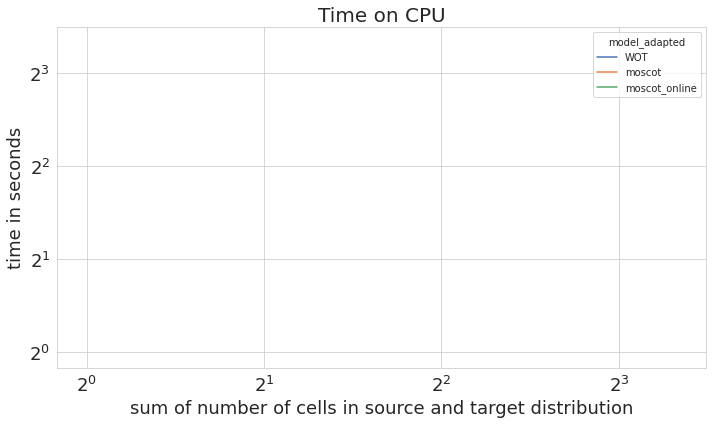

In [12]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='result.benchmark_result', hue="model_adapted", marker='o', 
                     data=results, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('time in seconds', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Time on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()

#plt.savefig(os.path.join("figures", "f_cpu_time_full_rank.png"), dpi=300)

In [26]:
def adapt_error(x):
    if isinstance(x['result.error'], np.ndarray):
        return x['result.error'][0]
    return x['result.error']

results["error_adapted"] = results.apply(lambda x: adapt_error(x), axis=1)

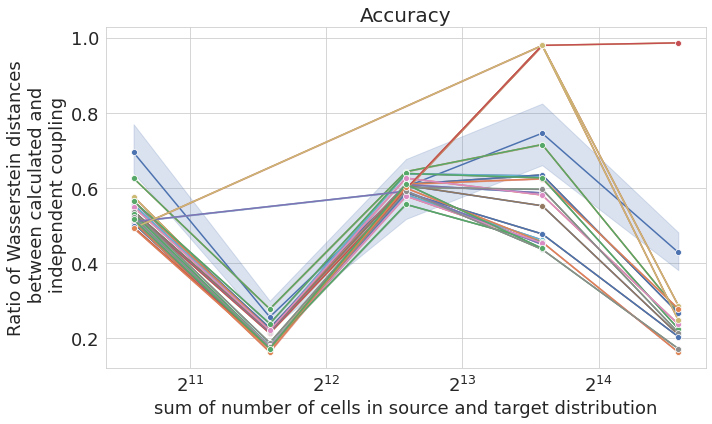

In [27]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted", marker='o', 
                     data=results, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Ratio of Wasserstein distances\n between calculated and\n independent coupling', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Accuracy", fontsize=20)
_, xlabels = plt.xticks()



axs.get_legend().remove()
plt.tight_layout()

In [13]:
results_filtered = results[~ results['model_adapted'].str.startswith("moscot_online")]

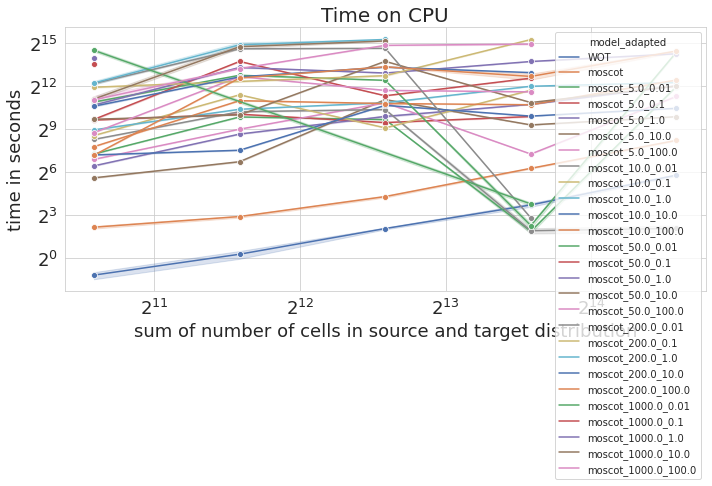

In [14]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='result.benchmark_result', hue="model_adapted", marker='o', 
                     data=results_filtered, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('time in seconds', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Time on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()


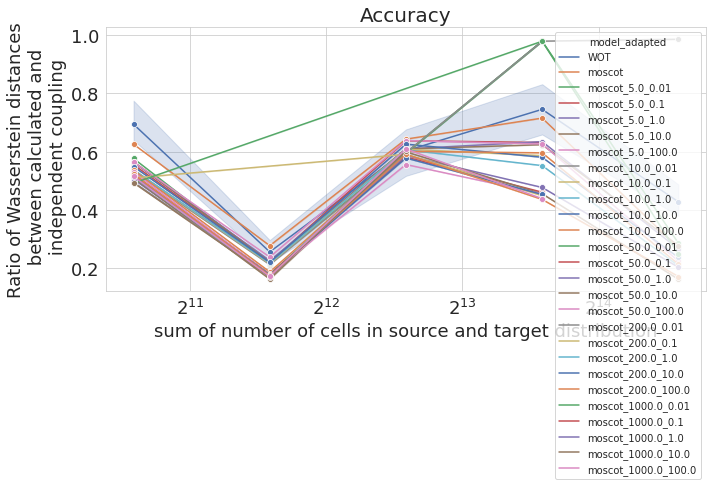

In [15]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted", marker='o', 
                     data=results_filtered, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Ratio of Wasserstein distances\n between calculated and\n independent coupling', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Accuracy", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()

In [16]:
results_filtered_2 = results[results['model_adapted'].str.startswith("moscot_5")]

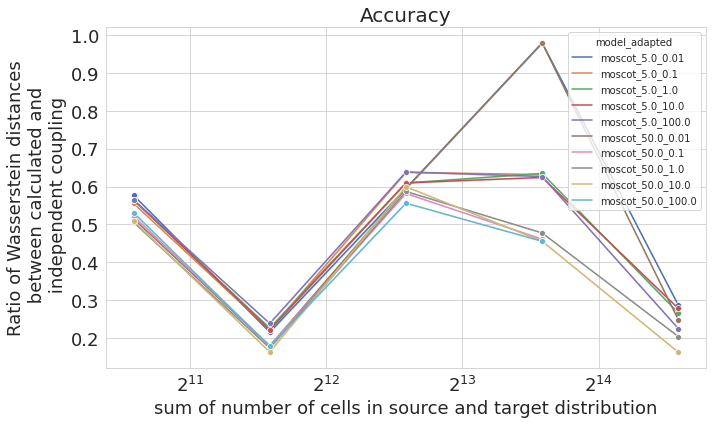

In [17]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted", marker='o', 
                     data=results_filtered_2, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Ratio of Wasserstein distances\n between calculated and\n independent coupling', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Accuracy", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()